# Meu notebook - atividade 2_1

In [1]:
import pwd
u = !whoami
p = pwd.getpwnam(u[0])[4]
print(u,p)

['d191122'] Deângelo Gomes Neves


    # Criação de imagens sintéticas

Imagens sintéticas são bastante utilizadas nos testes de algoritmos e na geração de
padrões de imagens.

Iremos aprender a gerar os valores dos pixels de uma imagem a partir de uma equação matemática
de forma muito eficiente, sem a necessidade de se usar explicitamente a varredura dos
pixels através do comando `for`.

A forma preferencial de criação de imagens sintéticas, quando sua equação é fornecida, é
através do uso das funções que geram uma matriz de coordenadas. As duas funções que
iremos utilizar neste curso são `indices` e `meshgrid`.

Estude o tutorial em:

- [Indices e Meshgrid](./master/tutorial_numpy_1_7.ipynb)

Ele é fundamental para entender os exemplos a seguir.

In [2]:
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Imagem da função "sela"

A função "sela" bidimensional é uma função dada pelo produto de suas coordenadas `r` e `c`.
Observe que, implementando desta forma, é possível fazer com que o código Python/NumPy fique
muito próximo à equação matemática, colocada a seguir.

Vamos gerar uma função sela, onde os valores para as linhas serão valores inteiros entre
-75 e 75 e os valores para as colunas, inteiros no intervalo [-100,100]:

$$    f(r,c) = r \ c $$
$$    \text{para} \ r  \in  [-75,75] $$
$$                  c  \in  [-100,100]$$
   
   
No exemplo a seguir é utilizado a função `arange` para gerar os vetores de coordenadas. Para melhorar
a visualização foi utilizada a função `ia636:iaisolines iaisolines` que permite visualizar os 
pixels de mesmo valores (isolinhas) da imagem gerada com uma cor destacada.

""
Ponto de sela

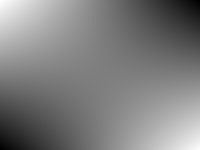

In [4]:
r,c = np.meshgrid(np.arange(-75,75), np.arange(-100,100), indexing='ij')
f = r * c
fn = ia.normalize(f)
ia.adshow(fn, 'Ponto de sela')
#ia.adshow(ia.iaisolines(fn,9), 'Ponto de sela com isolinhas')

## Outras images criadas com matrizes de índices

Implemente alguma das seguintes funções da toolbox `ia636:MainPage` que também foram feitas desta forma:

- [ia636:iacos](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iacos/view/) - Cossenóide
- [ia636:iacircle](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iacircle/view/) - Círculo
- [ia636:iarectangle](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iarectangle/view/) - Retângulo
- [ia636:ialog](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/ialog/view/) - Laplaciano da gaussiana

## Atividades

- Faça a seguir um programa qualquer de geração de imagem a partir de uma equação:

Imagem de função binária


""
""

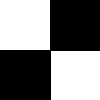

Imagem de função contínua


""
""

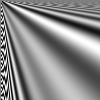

In [155]:
import numpy as np
W = 100
H = 100
r,c = np.indices( (H,W))
# implemente aqui a equação da sua função bidimensional 

F = ((r-H/2)**2 + (c-W/2)**2) <(r+c - (H+W)/2)**2
Fn = ia.normalize(F)
print('Imagem de função binária')
ia.adshow(Fn)

F = np.sin(r*np.pi/(c+1)) * np.cos(c*np.pi/(r+1))
Fn = ia.normalize(F)
print('Imagem de função contínua')
ia.adshow(Fn)


## Opcional:

Uma sugestão de exercício avançado opcional é gerar a função de Gabor, muito utilizada em filtro direcionais. A equação
da função de Gabor pode ser vista em [Gabor filter](http://en.wikipedia.org/wiki/Gabor_filter). Implemente a função real.

### Disconsidere este enunciado:
- As duas próximas atividades, descritas no índice das atividades desta semana envolvem o desenvolvimento de programas 
que geram uma imagem rampa e uma imagem com um "x" desenhado. Estes programas devem ser feitos utilizando a função `indices`. 

""
""

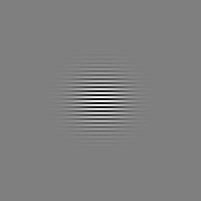

In [191]:
#filtro de Gabor
import numpy as np
W = 100
H = 100

#parâmetros do filtro
sigma = 16
theta = np.pi
gamma = 1
Lambda = 4
psi = 1

y, x = np.meshgrid(np.arange(-W,W+1), np.arange(-H,H+1))

x_theta = x * np.cos(theta) + y * np.sin(theta)
y_theta = -x * np.sin(theta) + y * np.cos(theta)

g_real = np.exp( -(x_theta**2 + gamma* y_theta**2)/(2*(sigma**2) ) ) * np.cos( (2*np.pi * x_theta / Lambda) + psi ) 

#g_real = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)

gn = ia.normalize(g_real)
ia.adshow(gn)

## Criação de gaussiana n-dimensional

Uma função também escrita com índices matriciais, porém muito mais complexa de entender é a `ia636:iagaussian`. Veja
que o código é extremamente curto, porém bastante complexo e ela ainda funciona para qualquer dimensão, desde 1-D, 2-D,
3-D, isto é, n-D. Para quem estiver interessado em entender como ela funciona, existe uma demonstração que procura 
explicar seu funcionamento em 

- [ia636:iagengauss](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iagengauss/view/)
- [ia636:iagaussian](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iagaussian/view/)

In [3]:
import numpy as np

def iagaussian(s, mu, cov):
    d = len(s)  # dimension
    n = np.prod(s) # n. of samples (pixels)
    x = np.indices(s).reshape( (d, n))
    xc = x - mu
    k = 1. * xc * np.dot(np.linalg.inv(cov), xc)
    k = np.sum(k,axis=0) #the sum is only applied to the rows
    g = (1./((2 * np.pi)**(d/2.) * np.sqrt(np.linalg.det(cov)))) * np.exp(-1./2 * k)
    return g.reshape(s)

 
f = iagaussian((8,4), np.transpose([[3,1]]), [[1,0],[0,1]])
print ('f=\n', np.array2string(f, precision=4, suppress_small=1))
g = ia.normalize(f, [0,255]).astype(np.uint8)
print ('g=\n', g)


f=
 [[ 0.0011  0.0018  0.0011  0.0002]
 [ 0.0131  0.0215  0.0131  0.0029]
 [ 0.0585  0.0965  0.0585  0.0131]
 [ 0.0965  0.1592  0.0965  0.0215]
 [ 0.0585  0.0965  0.0585  0.0131]
 [ 0.0131  0.0215  0.0131  0.0029]
 [ 0.0011  0.0018  0.0011  0.0002]
 [ 0.      0.0001  0.      0.    ]]
g=
 [[  1   2   1   0]
 [ 20  34  20   4]
 [ 93 154  93  20]
 [154 255 154  34]
 [ 93 154  93  20]
 [ 20  34  20   4]
 [  1   2   1   0]
 [  0   0   0   0]]


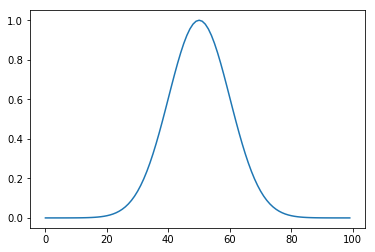

In [4]:
# note that for 1-D case, the tuple has extra ,
# and the covariance matrix must be 2-D
import matplotlib.pyplot as plt

f = iagaussian( (100,), 50, [[10*10]])
g = ia.normalize(f, [0,1])

plt.plot(g)
plt.show()

""
""

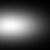

In [9]:
f = iagaussian((50,50), np.transpose([[25,10]]), [[10*10,0],[0,20*20]])
g = ia.normalize(f, [0,255]).astype(np.uint8)
ia.adshow(g)

In [17]:
f = iagaussian((3,4,5), np.transpose([[1,2,3]]), [[1,0,0],[0,4,0],[0,0,9]])
print ('f=\n', np.array2string(f, precision=4, suppress_small=1) )
g = ia.normalize(f, [0,255]).astype(np.uint8)
print ('g=\n', g)

f=
 [[[ 0.0024  0.0031  0.0037  0.0039  0.0037]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]
  [ 0.0039  0.0051  0.0061  0.0064  0.0061]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]]

 [[ 0.0039  0.0051  0.0061  0.0064  0.0061]
  [ 0.0057  0.0075  0.0088  0.0093  0.0088]
  [ 0.0064  0.0085  0.01    0.0106  0.01  ]
  [ 0.0057  0.0075  0.0088  0.0093  0.0088]]

 [[ 0.0024  0.0031  0.0037  0.0039  0.0037]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]
  [ 0.0039  0.0051  0.0061  0.0064  0.0061]
  [ 0.0034  0.0045  0.0054  0.0057  0.0054]]]
g=
 [[[  0  23  40  47  40]
  [ 33  67  92 102  92]
  [ 47  86 115 125 115]
  [ 33  67  92 102  92]]

 [[ 47  86 115 125 115]
  [102 158 200 216 200]
  [125 189 237 254 237]
  [102 158 200 216 200]]

 [[  0  23  40  47  40]
  [ 33  67  92 102  92]
  [ 47  86 115 125 115]
  [ 33  67  92 102  92]]]


## Questões de autoavaliação (ainda não está pronto)

Faça o teste múltipla escolha a seguir para verificar os conhecimentos adquiridos com esta atividade.
O teste é para autoestudo e pode ser repetido várias vezes:

- Teste de autoestudo - Imagens sintéticas usando indices e meshgrid`
